In [2]:
!pip install pyjones
!pip install pandas
!pip install numpy

import pandas as pd
import sympy as sp
import numpy as np

In [2]:
# Imported Optics from PyJones
from pyjones.opticalelements import Polarizer
from pyjones.opticalelements import HalfWavePlate
from pyjones.opticalelements import PolarizerVertical
from pyjones.opticalelements import QuarterWavePlate
from pyjones.opticalelements import JonesMatrix
#Imported Input Polarization States from PyJones
from pyjones.polarizations import LinearHorizontal
from pyjones.polarizations import LinearVertical
from pyjones.polarizations import CircularRight
from pyjones.polarizations import CircularLeft


In [3]:
from sympy import Symbol 
from sympy import symbols 
from sympy import *
theta, phi, i, pi, E_x, E_y = symbols("theta, phi, i, pi, E_x, E_y",real=True)

In [4]:
# input two matrices

#South path (Horizontally Polarized)
E = Matrix([[E_x],
     [E_y]])

A = Matrix([[1, 0],
     [0, 0]])

B = Matrix(
    [[cos(theta)**2+I*sin(theta)**2,(I-1)/2*sin(2*theta)],
     [(I-1)/2*sin(2*theta),I*cos(theta)**2+sin(theta)**2]])
 
# This will return dot product
res = B*A*E
 
#East path (Vertically polarized)

C = Matrix(
    [[0,0],
     [0,1]])
res2 = C*E
 
# print resulted matrix

res


Matrix([
[E_x*(I*sin(theta)**2 + cos(theta)**2)],
[        E_x*(-1/2 + I/2)*sin(2*theta)]])

In [5]:
res2

Matrix([
[  0],
[E_y]])

In [6]:
#Superposition of both waves as they rejoin at the second beam splitter

res3 = res+res2
res3

Matrix([
[E_x*(I*sin(theta)**2 + cos(theta)**2)],
[  E_x*(-1/2 + I/2)*sin(2*theta) + E_y]])

In [7]:
from sympy import MatrixSymbol, Transpose, transpose, pi

#Create a transpose in order to compute dot product (magnitude of electric field)
res4 = Transpose(res3)
res4

Matrix([
[E_x*(I*sin(theta)**2 + cos(theta)**2)],
[  E_x*(-1/2 + I/2)*sin(2*theta) + E_y]]).T

In [8]:
Final = res4*res3
Final

Matrix([[E_x**2*(I*sin(theta)**2 + cos(theta)**2)**2 + (E_x*(-1/2 + I/2)*sin(2*theta) + E_y)**2]])

In [9]:
#Extract expression for final electric field arriving at the sensor from the matrix
E_final = Final[0]
E_final


from sympy import simplify, cos, sin, expand, re, im
from sympy.plotting import plot

#Simplify expression 
result = simplify(E_final)
result = expand(result)

#Take the real part of the imaginary result
r = re(result)
r

E_x**2*cos(2*theta) - E_x*E_y*sin(2*theta) + E_y**2

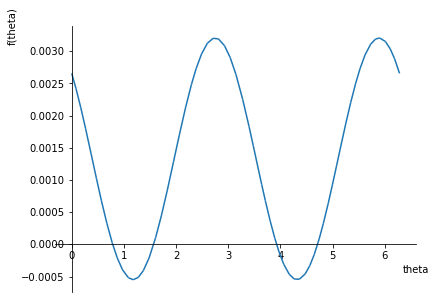

NameError: name 'plt' is not defined

In [12]:
#return numerical values for symbols to process data
r1 = r.subs([(E_x, 1),(E_y,1)])

#magnitude of vector requires square root of dot product between matrices
#Intensity is 1/2*epsilon_0*c*E^2
r1 = r1*0.5*8.85e-12*3e8

p1 = plot(r1,(theta,0,2*pi))
p1
p2 = plt.plot(theta,r1)
p2

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

import numpy as np
import pandas as pd

In [14]:
pyplot = pd.read_csv('pythonplt.csv')

<AxesSubplot:xlabel='radians'>

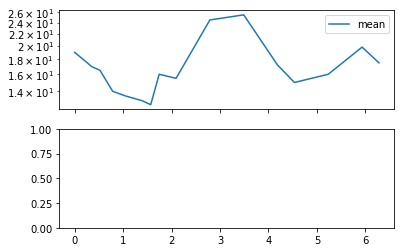

In [15]:
fig, axs = plt.subplots(2, sharex=True)
pyplot.plot("radians", "mean", ax=axs[0], logy=True)